In [ ]:
#PS5

In [ ]:
# Problem 1

In [2]:
#Imports
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Constants
G = 6.67430e-11


In [34]:
# Leapfrog method
G = 6.67430e-11
"""
    v_half = velocities + 0.5 * dt * accelerations
    positions += dt * velocities_half
    velocities_new = velocities_half + dt * new_accelerations
"""
    
# Gravitational acceleration
def gravitational_acceleration(positions, masses):
    
    n = len(masses)
    accelerations = np.zeros_like(positions)  # initialize the accelerations array
    
    for i in range(n):
        for j in range(n):
            if i != j:
                displacement = positions[j] - positions[i]
                distance_squared = np.sum(displacement ** 2)

                # Direction of the force is the unit displacement vector
                direction = displacement / np.sqrt(distance_squared)
                
                accelerations[i] += (G * masses[j] * direction)  / distance_squared
                
    return accelerations

                
def leapfrog(positions, velocities, masses, dt):
    
    accelerations = gravitational_acceleration(positions, masses)
    
    velocities_half = velocities + 0.5 * dt * accelerations
    positions_new = positions + dt * velocities_half
    new_accelerations = gravitational_acceleration(positions_new, masses)
    velocities_new = velocities_half + 0.5 * dt * new_accelerations


    return positions_new, velocities_new
    
   # a=np.sum(G*mj*(xj-xi)/(xj-xi)**3)

def leapfrog_solve(init_positions, init_velocities, masses, t_start, t_end, dt):
    """
    Solves N-body problem using the leapfrog method.
    """
    nt = int(np.ceil((t_end - t_start) / dt))  # Number of steps

    # Initialize arrays to store time, positions, and velocities
    times = np.zeros(nt+1)
    positions = np.zeros((nt+1, n, 2))  # Adjust for 3D if necessary
    velocities = np.zeros_like(positions)

    # Set initial conditions
    times[0] = t_start
    positions[0] = init_positions
    velocities[0] = init_velocities

    # Main simulation loop
    for i in range(nt):
        times[i + 1] = times[i] + dt
        positions[i + 1], velocities[i + 1] = leapfrog(positions[i], velocities[i], masses, dt)

    return times, positions, velocities

# Usage example:
masses = np.array([1.989e30, 5.972e24])  # Masses for the Sun and Earth
init_positions = np.array([[0, 0], [1.496e11, 0]])  # Initial positions
init_velocities = np.array([[0, 0], [0, 29780]])  # Initial velocities

t_start = 0
t_end = 1.5678e8 #3.154e7  
dt = 1000  # time step

times, positions, velocities = leapfrog_solve(init_positions, init_velocities, masses, t_start, t_end, dt)

# 'times', 'positions', and 'velocities' now contain the trajectories of the bodies.


In [ ]:
1.5678e8 

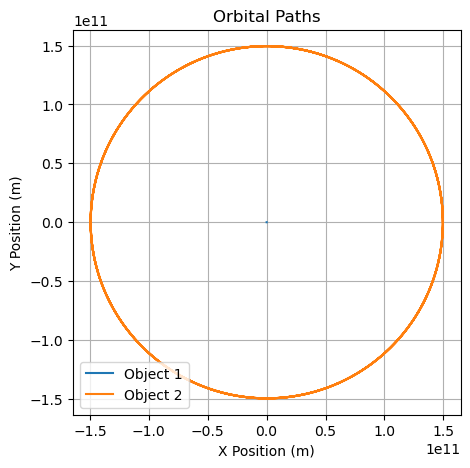

In [45]:
import matplotlib.pyplot as plt

# Extracting X and Y coordinates
x_positions = positions[:, :, 0]  # All time steps, all objects, X coordinate only
y_positions = positions[:, :, 1]  # All time steps, all objects, Y coordinate only

# Plotting
plt.figure(figsize=(5, 5))

for i in range(len(masses)):  # Assuming masses are global or passed to this part of the code
    plt.plot(x_positions[:, i], y_positions[:, i], label=f'Object {i+1}')

plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.title('Orbital Paths')
plt.legend()
plt.grid(True)
plt.axis('equal')  # Equal aspect ratio to ensure that the circles look like circles
plt.show()


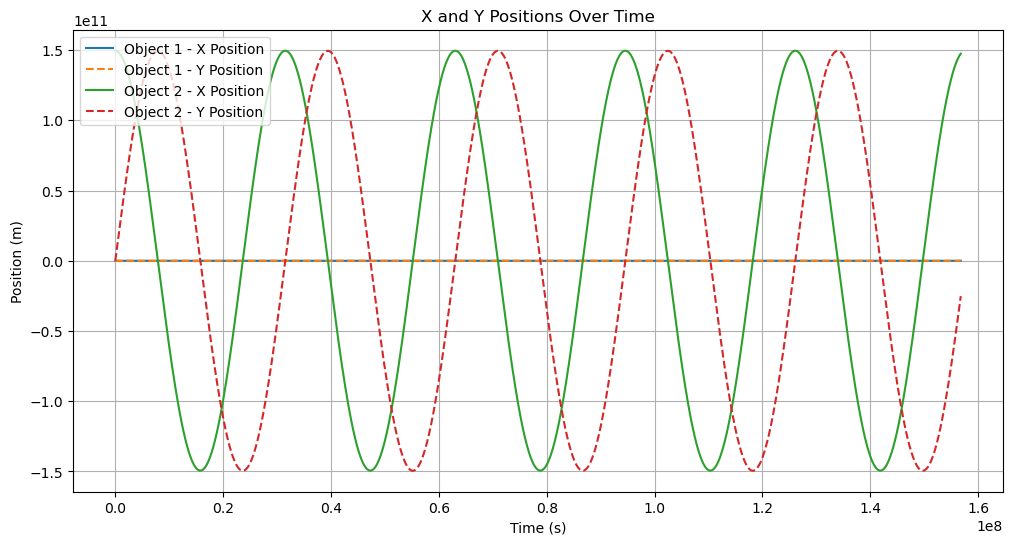

In [38]:
import matplotlib.pyplot as plt

# Extracting X and Y coordinates for all objects at all times
x_positions = positions[:, :, 0]  # All time steps, all objects, X coordinate only
y_positions = positions[:, :, 1]  # All time steps, all objects, Y coordinate only

plt.figure(figsize=(12, 6))

# Creating lines for each object's X and Y positions over time
for i in range(len(masses)):  # Loop over all celestial objects
    plt.plot(times, x_positions[:, i], label=f'Object {i+1} - X Position', linestyle='-', marker='')
    plt.plot(times, y_positions[:, i], label=f'Object {i+1} - Y Position', linestyle='--', marker='')

# Enhancing the plot
plt.title('X and Y Positions Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.grid(True)
plt.legend()  # Adding a legend to differentiate between objects and coordinates

# Show the plot
plt.show()



In [42]:
# Monitering the total energy and radius of the system
nt = int(np.ceil((t_end - t_start) / dt))
def calculate_energy(positions, velocities, masses):
    kinetic_energy = 0.5 * np.sum(masses * np.sum(velocities**2, axis=-1))  # KE = 0.5*m*v^2
    potential_energy = 0 

    for i in range(len(masses)):
        for j in range(i+1, len(masses)):
            distance = distance = np.linalg.norm(positions[i] - positions[j])
            potential_energy -= (G * masses[i] * masses[j]) / distance  # U = -G*m1*m2/r

    return kinetic_energy, potential_energy, kinetic_energy + potential_energy

# Variables to store maximum changes
max_radius_change = 0
max_energy_change = 0

# Previous values for comparison
previous_radius = None
previous_energy = None

# Running the simulation
for i in range(nt):
    current_positions = positions[i]
    current_velocities = velocities[i]

    # Calculate current orbital radius (for Earth, index 1, assuming Sun is index 0)
    orbital_radius = np.linalg.norm(current_positions[1] - current_positions[0])
    
    # Calculate energy
    kinetic, potential, total_energy = calculate_energy(current_positions, current_velocities, masses)

    if previous_radius is not None:
        radius_change = np.abs(orbital_radius - previous_radius) / previous_radius
        max_radius_change = max(max_radius_change, radius_change)

    if previous_energy is not None:
        energy_change = np.abs(total_energy - previous_energy) / previous_energy
        max_energy_change = max(max_energy_change, energy_change)

    previous_radius = orbital_radius
    previous_energy = total_energy

# After simulation, check if changes are within acceptable limits
if max_radius_change > 0.005 or max_energy_change > 0.005:  # thresholds are examples, can be set based on precision needs
    print(f"Max radius change: {max_radius_change*100:.2f}%, max energy change: {max_energy_change*100:.2f}%")
    print("Consider decreasing time step or improving integrator accuracy.")
else:
    print("Simulation is stable within set thresholds.")


Simulation is stable within set thresholds.


In [44]:
#Printing values after each orbital
# Define the time for one orbit (in seconds, considering one year)
one_orbit_time = (t_end - t_start) / 5

# We'll keep track of the next time we expect an orbit to complete
next_orbit_completion_time = one_orbit_time  # Initialize to the end of the first orbit

# Running the simulation
for i in range(nt):
    current_time = t_start + i * dt  # Current simulation time
    current_positions = positions[i]
    current_velocities = velocities[i]

    # Calculate current orbital radius (for Earth, index 1, assuming Sun is index 0)
    orbital_radius = np.linalg.norm(current_positions[1] - current_positions[0])

    # Calculate energy
    kinetic, potential, total_energy = calculate_energy(current_positions, current_velocities, masses)

    # Store max changes if they are higher than the previous ones
    if previous_radius is not None:
        radius_change = np.abs(orbital_radius - previous_radius) / previous_radius
        max_radius_change = max(max_radius_change, radius_change)

    if previous_energy is not None:
        energy_change = np.abs(total_energy - previous_energy) / previous_energy
        max_energy_change = max(max_energy_change, energy_change)

    # Check if we've reached the end of an orbit
    if current_time >= next_orbit_completion_time:
        print(f"After one orbit (Year {int(current_time/one_orbit_time):d}):")
        print(f" - Orbital radius: {orbital_radius:.2f} m")
        print(f" - Total energy: {total_energy:.2f} J")
        print(f" - Max radius change since last orbit: {max_radius_change*100:.2f}%")
        print(f" - Max energy change since last orbit: {max_energy_change*100:.2f}%\n")
        
        # Update the time we expect the next orbit to complete
        next_orbit_completion_time += one_orbit_time

        # Reset max changes for the next orbit
        max_radius_change = 0
        max_energy_change = 0

    previous_radius = orbital_radius
    previous_energy = total_energy

# Additional summary or actions after the loop...


After one orbit (Year 1):
 - Orbital radius: 149537974118.57 m
 - Total energy: -2651295215349033092589395772440576.00 J
 - Max radius change since last orbit: 0.00%
 - Max energy change since last orbit: 0.00%

After one orbit (Year 2):
 - Orbital radius: 149437572176.06 m
 - Total energy: -2651295215384449111828661201272832.00 J
 - Max radius change since last orbit: 0.00%
 - Max energy change since last orbit: 0.00%

After one orbit (Year 3):
 - Orbital radius: 149437722293.47 m
 - Total energy: -2651295215384423171094807547215872.00 J
 - Max radius change since last orbit: 0.00%
 - Max energy change since last orbit: 0.00%

After one orbit (Year 4):
 - Orbital radius: 149538216525.40 m
 - Total energy: -2651295215348980634660936160903168.00 J
 - Max radius change since last orbit: 0.00%
 - Max energy change since last orbit: 0.00%



In [ ]:
# Problem 2
